In [2]:
import numpy as np
import matplotlib.pyplot as plt

## ¿Que es un filtro?

un filtro es simplemente un sistema que modifica a una secuencia de entrada $x[n]$ para obtener una salida $y[n]$ entre otras representaciónes es común representar sistemas mediante ecuaciones en diferecias a coeficientes constantes:

$$\sum^{N}_{k=0}a_k y(n-k)=\sum^{M}_{k=0}b_k x[n-k]$$

podemos reordenar quitando el elemento 0 del primer sumatorio y obtener:

$$y(n-0)+\sum^{N}_{k=1}a_k y(n-k)=\sum^{M}_{k=0}b_k x[n-k]$$

para quedarnos con una forma mas general:

$$y(n)=-\sum^{N}_{k=1}a_k y(n-k) +\sum^{M}_{k=0}b_k x[n-k]$$

la funcion expresa la salida en terminos de las condiciones pasadas de la salida y la entrada.
### Preguntas:
que pasará si nuestra ecuacion en diferencias tiene M=2
$$y[n]= b_0 x[n] + b_1 x[n-1] + b_2 x[n-2]$$

y si M=1 y N=1

$$y[n]=-a_k y[n-1] + b_0 x[n] + b_1 x[n-1] $$

**desarrollen M=2 N=2**


veamos que el ultimo valor no es nulo!: ultimo valor -0.00390625


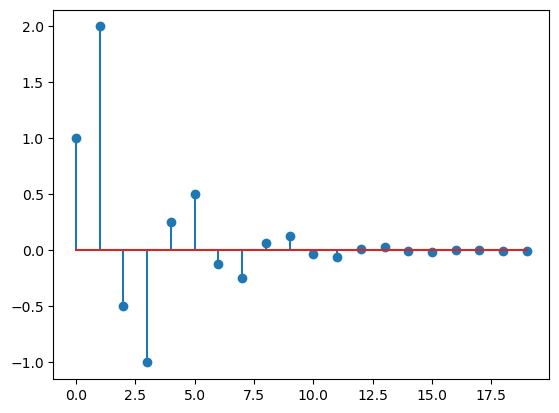

In [4]:
#implementemos M=1 N=1 y calcmos us respuesta al impulso: h[n]
x=np.zeros(20)
x[0]=1
y=[0] # cuiado que aqui agrego una condicion incial esta debiera de quitarla o considerar que el vector empieza en n=-1
h=[]
for n in range(len(x)):
    out= -0.5*y[n-1]+x[n]+2*x[n-1]
    y.append(out)
    h.append(out)
    

print("veamos que el ultimo valor no es nulo!: ultimo valor",h[-1])
plt.stem(h)
plt.show()


veamos que el ultimo valor no es nulo!: ultimo valor 0.0


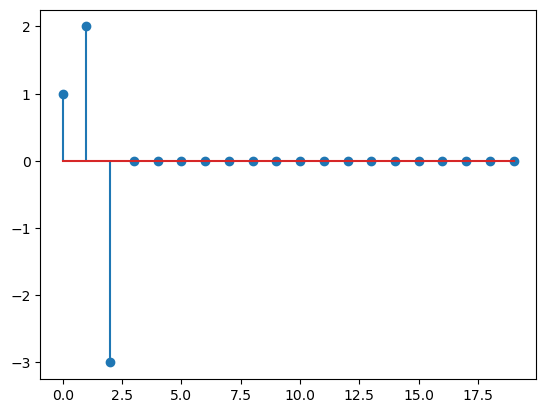

In [26]:
#implementemos M=0 N=2 y calcmos us respuesta al impulso: h[n]
x=np.zeros(20)
x[0]=1
y=[] # ahora no necesito las muestras inciales
h=[]
for n in range(len(x)):
    out=+x[n]+2*x[n-1]-3*x[n-2]
    y.append(out)
    h.append(out)

print("veamos que el ultimo valor no es nulo!: ultimo valor",y[-1])
plt.stem(y)
plt.show()

#### esto ultimo que vimos es una diferenciacion importante entre filtros, basados en su respuesta al impulso.

**En el primer caso econtramos un filtro de respuesta Infitinta al Impulso (Infinite Impulse Response) IIR**

**En el segundo caso encontramos un filtro de respuesta finita al Impulso (Finite Impulse Response) FIR**

**Empezaremos estudiando los filtros FIR**

 ## Filtros FIR
$$\require{cancel}$$  
$$y(n)=\cancelto{0}{-\sum^{N}_{k=1}a_k y(n-k)}  +\sum^{M}_{k=0}b_k x[n-k]$$

$$y(n)=\sum^{M}_{k=0}b_k x[n-k]$$

* Diseño con fase lineal
* No recursivos los coeficientes $a_k$ de su ecuación en diferencias son 0 (No dependen de valores previos de las salida)
* Siempre son estables (no tienen retroalimentación, si la entrada se vuelve "0" eventualmente la salida irá a 0.
* Faciles de implementar (Convolución, cálculo directo)
* La respuesta al impulso coincide con el vector de coeficientes $b_k$
 
 
 otra representacion conveniente:
 $$y[n]= b_0 x(n) + b_1 x(n-1) + b_2 x(n-2) + ... + b_n x(n-M+1)$$
 
 y esto reescribirlo de manera tal que ahora nuestra letra N responda a la longitud de nuestro filtro:
 
 $$y(n)=\sum^{N-1}_{k=0}b_k x[n-k]$$
 
<div>
<img src="filtro_fir.jpg" width="600"/>
</div>

ahora si miramos un poco la formula y consideramos se trata de un sistema LTI podriamos encontrar cierto parecido...

**filtro FIR**
$$y(n)=\sum^{M}_{k=0}b_k x[n-k]$$

**convolucion**
$$y(n)=\sum^{\infty}_{k=-\infty}h[k] x[n-k]$$

las principales diferencias la encontramos en los limites del sumatorio pero...

si consideramos:

\begin{align}
h(k)= \begin{cases} 0 & k<0 \\
h(k) & 0\leq k \leq N  \\
0 & k\geq N
\end{cases}
\end{align}


$$y(n)=\sum^{N-1}_{k=0}h[k] x[n-k]$$


## La conclusion importante aqui es indentificar que siendo que $h[k]$ es un vector que tiene $h_k = b_k$ por tanto en un filtro FIR los coeficientes coinsiden con su respuesta al impulso!

## Filtros pasabajos metodo de la ventana:

<div>
<img src="Filtro_diagrama.jpg" width="650"/>
</div>


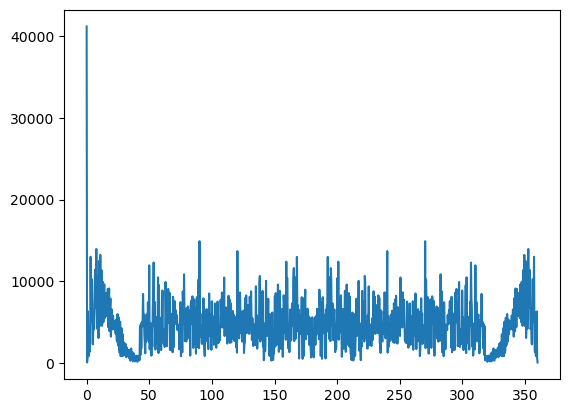

In [12]:
data=np.loadtxt("necg.txt")
fs=360
freq=np.linspace(0,fs,len(data))
X=np.fft.fft(data)
plt.plot(freq,np.abs(X))

np.ones()
plt.show()

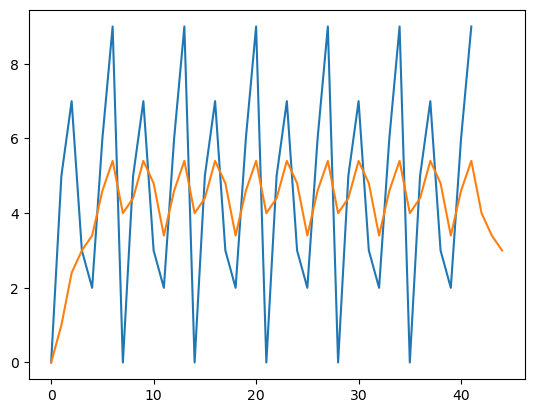

In [36]:
a=[0,5,7,3,2,6,9,0,5,7,3,2,6,9,0,5,7,3,2,6,9,0,5,7,3,2,6,9,0,5,7,3,2,6,9,0,5,7,3,2,6,9]
b=np.array([1,1,1,1,1])/5
c=np.convolve(a,b)
plt.plot(a)
plt.plot(c[:-1])
plt.show()

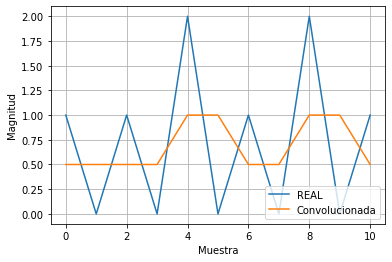

In [20]:
a=[1,0,1,0,2,0,1,0,2,0,1]
b=np.array([1,1])/2
c=np.convolve(a,b)
plt.plot(a, label='REAL')
plt.plot(c[:-1],label='Convolucionada')
plt.legend(loc='lower right')
plt.ylabel('Magnitud')
plt.xlabel('Muestra')
plt.grid()
plt.show()

## Media Movil

El filtro que vimos anteriormente del tipo FIR, es la media movil.
Muy utilizado para filtrar altas frecuencias y encontrar patrones de manera sencilla.
Este filtro se suele usar en las bolsas de valores, estandar,entre otras cosas.


Y lo mejor de estos filtros, es que si bien genera un retraso de n muestras (que eso debemos calcularlo en tiempo cuanto seria), es todo en tiempo real.